**Importing the necessary libraries**

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

# JHU data
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

**Define objects to organize the JHU data**

In [2]:
class CovidTimeSeries(object):
    """ Stores the JHU time series data for a county for covid """
    def __init__(self):
        self.UID= None
        self.iso2=None
        self.iso3=None
        self.code3=None
        self.FIPS=None
        self.Admin2=None
        self.Province_State=None
        self.Country_Region=None
        self.Lat=None
        self.Long=None
        self.Combined_Key=None
        self.Population=None
        self.infections=None
        self.deaths=None
        
        
 
class CovidDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, filenameD, startdate, enddate):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
                data.append(lv)

        header=data[0]
        infectionData=data[1:]

        csvfiled=open(filenameD, newline='')
        rd = csv.reader(csvfiled, delimiter=',')
        datad=[]
        for lv in rd:
                datad.append(lv)

        headerd=datad[0]
        deathData=datad[1:]

        startdate_index=header.index(startdate)
        enddate_index=header.index(enddate)
        startdate_indexd=headerd.index(startdate)
        enddate_indexd=headerd.index(enddate)

        CountyD={}
        N=len(infectionData);
        for i in range(N):
            pop1=int(deathData[i][11])
            if (pop1>0):
                c1=CovidTimeSeries()
                c1.Population=pop1
                c1.UID= infectionData[i][0]
                c1.iso2=infectionData[i][1]
                c1.iso3=infectionData[i][2]
                c1.code3=infectionData[i][3]
                fp=infectionData[i][4]
                if (fp==''):
                    x=-1
                else:
                    x=int(float(fp))
                c1.FIPS=x
                c1.Admin2=infectionData[i][5]
                c1.Province_State=infectionData[i][6]
                c1.Country_Region=infectionData[i][7]
                c1.Lat=float(infectionData[i][8])
                c1.Long=float(infectionData[i][9])
                c1.Combined_Key=infectionData[i][10]
                c1.infections=np.array([float(a) for a  in infectionData[i][startdate_index:enddate_index+1]])
                c1.deaths=np.array([float(a) for a  in deathData[i][startdate_indexd:enddate_indexd+1]])
                CountyD[x]=c1
        self.DateRange=header[startdate_index:enddate_index+1]
        self.CovidData=CountyD


**Data Files**

In [3]:
# Modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc="..\\Data\\JHU Data\\"
elif platform.system() == "Linux":
    pathc="../Data/JHU Data/"

confirmed_fname="time_series_covid19_confirmed_US.csv"
deaths_fname="time_series_covid19_deaths_US.csv"

startdate='1/22/20'
enddate='5/14/21'

database=CovidDatabase();
database.loadTimeSeries(pathc+confirmed_fname, pathc+deaths_fname, startdate, enddate)

1001 Autauga, Alabama, US
1003 Baldwin, Alabama, US
1005 Barbour, Alabama, US
1007 Bibb, Alabama, US
1009 Blount, Alabama, US
1011 Bullock, Alabama, US
1013 Butler, Alabama, US
1015 Calhoun, Alabama, US
1017 Chambers, Alabama, US
1019 Cherokee, Alabama, US
1021 Chilton, Alabama, US
1023 Choctaw, Alabama, US
1025 Clarke, Alabama, US
1027 Clay, Alabama, US
1029 Cleburne, Alabama, US
1031 Coffee, Alabama, US
1033 Colbert, Alabama, US
1035 Conecuh, Alabama, US
1037 Coosa, Alabama, US
1039 Covington, Alabama, US
1041 Crenshaw, Alabama, US
1043 Cullman, Alabama, US
1045 Dale, Alabama, US
1047 Dallas, Alabama, US
1049 DeKalb, Alabama, US
1051 Elmore, Alabama, US
1053 Escambia, Alabama, US
1055 Etowah, Alabama, US
1057 Fayette, Alabama, US
1059 Franklin, Alabama, US
1061 Geneva, Alabama, US
1063 Greene, Alabama, US
1065 Hale, Alabama, US
1067 Henry, Alabama, US
1069 Houston, Alabama, US
1071 Jackson, Alabama, US
1073 Jefferson, Alabama, US
1075 Lamar, Alabama, US
1077 Lauderdale, Alabama, US
1

13223 Paulding, Georgia, US
13225 Peach, Georgia, US
13227 Pickens, Georgia, US
13229 Pierce, Georgia, US
13231 Pike, Georgia, US
13233 Polk, Georgia, US
13235 Pulaski, Georgia, US
13237 Putnam, Georgia, US
13239 Quitman, Georgia, US
13241 Rabun, Georgia, US
13243 Randolph, Georgia, US
13245 Richmond, Georgia, US
13247 Rockdale, Georgia, US
13249 Schley, Georgia, US
13251 Screven, Georgia, US
13253 Seminole, Georgia, US
13255 Spalding, Georgia, US
13257 Stephens, Georgia, US
13259 Stewart, Georgia, US
13261 Sumter, Georgia, US
13263 Talbot, Georgia, US
13265 Taliaferro, Georgia, US
13267 Tattnall, Georgia, US
13269 Taylor, Georgia, US
13271 Telfair, Georgia, US
13273 Terrell, Georgia, US
13275 Thomas, Georgia, US
13277 Tift, Georgia, US
13279 Toombs, Georgia, US
13281 Towns, Georgia, US
13283 Treutlen, Georgia, US
13285 Troup, Georgia, US
13287 Turner, Georgia, US
13289 Twiggs, Georgia, US
13291 Union, Georgia, US
13293 Upson, Georgia, US
13295 Walker, Georgia, US
13297 Walton, Georgia

20089 Jewell, Kansas, US
20091 Johnson, Kansas, US
20093 Kearny, Kansas, US
20095 Kingman, Kansas, US
20097 Kiowa, Kansas, US
20099 Labette, Kansas, US
20101 Lane, Kansas, US
20103 Leavenworth, Kansas, US
20105 Lincoln, Kansas, US
20107 Linn, Kansas, US
20109 Logan, Kansas, US
20111 Lyon, Kansas, US
20115 Marion, Kansas, US
20117 Marshall, Kansas, US
20113 McPherson, Kansas, US
20119 Meade, Kansas, US
20121 Miami, Kansas, US
20123 Mitchell, Kansas, US
20125 Montgomery, Kansas, US
20127 Morris, Kansas, US
20129 Morton, Kansas, US
20131 Nemaha, Kansas, US
20133 Neosho, Kansas, US
20135 Ness, Kansas, US
20137 Norton, Kansas, US
20139 Osage, Kansas, US
20141 Osborne, Kansas, US
20143 Ottawa, Kansas, US
20145 Pawnee, Kansas, US
20147 Phillips, Kansas, US
20149 Pottawatomie, Kansas, US
20151 Pratt, Kansas, US
20153 Rawlins, Kansas, US
20155 Reno, Kansas, US
20157 Republic, Kansas, US
20159 Rice, Kansas, US
20161 Riley, Kansas, US
20163 Rooks, Kansas, US
20165 Rush, Kansas, US
20167 Russell, 

28089 Madison, Mississippi, US
28091 Marion, Mississippi, US
28093 Marshall, Mississippi, US
28095 Monroe, Mississippi, US
28097 Montgomery, Mississippi, US
28099 Neshoba, Mississippi, US
28101 Newton, Mississippi, US
28103 Noxubee, Mississippi, US
28105 Oktibbeha, Mississippi, US
28107 Panola, Mississippi, US
28109 Pearl River, Mississippi, US
28111 Perry, Mississippi, US
28113 Pike, Mississippi, US
28115 Pontotoc, Mississippi, US
28117 Prentiss, Mississippi, US
28119 Quitman, Mississippi, US
28121 Rankin, Mississippi, US
28123 Scott, Mississippi, US
28125 Sharkey, Mississippi, US
28127 Simpson, Mississippi, US
28129 Smith, Mississippi, US
28131 Stone, Mississippi, US
28133 Sunflower, Mississippi, US
28135 Tallahatchie, Mississippi, US
28137 Tate, Mississippi, US
28139 Tippah, Mississippi, US
28141 Tishomingo, Mississippi, US
28143 Tunica, Mississippi, US
28145 Union, Mississippi, US
28147 Walthall, Mississippi, US
28149 Warren, Mississippi, US
28151 Washington, Mississippi, US
28153 

37169 Stokes, North Carolina, US
37171 Surry, North Carolina, US
37173 Swain, North Carolina, US
37175 Transylvania, North Carolina, US
37177 Tyrrell, North Carolina, US
37179 Union, North Carolina, US
37181 Vance, North Carolina, US
37183 Wake, North Carolina, US
37185 Warren, North Carolina, US
37187 Washington, North Carolina, US
37189 Watauga, North Carolina, US
37191 Wayne, North Carolina, US
37193 Wilkes, North Carolina, US
37195 Wilson, North Carolina, US
37197 Yadkin, North Carolina, US
37199 Yancey, North Carolina, US
38001 Adams, North Dakota, US
38003 Barnes, North Dakota, US
38005 Benson, North Dakota, US
38007 Billings, North Dakota, US
38009 Bottineau, North Dakota, US
38011 Bowman, North Dakota, US
38013 Burke, North Dakota, US
38015 Burleigh, North Dakota, US
38017 Cass, North Dakota, US
38019 Cavalier, North Dakota, US
38021 Dickey, North Dakota, US
38023 Divide, North Dakota, US
38025 Dunn, North Dakota, US
38027 Eddy, North Dakota, US
38029 Emmons, North Dakota, US
3

46017 Buffalo, South Dakota, US
46019 Butte, South Dakota, US
46021 Campbell, South Dakota, US
46023 Charles Mix, South Dakota, US
46025 Clark, South Dakota, US
46027 Clay, South Dakota, US
46029 Codington, South Dakota, US
46031 Corson, South Dakota, US
46033 Custer, South Dakota, US
46035 Davison, South Dakota, US
46037 Day, South Dakota, US
46039 Deuel, South Dakota, US
46041 Dewey, South Dakota, US
46043 Douglas, South Dakota, US
46045 Edmunds, South Dakota, US
46047 Fall River, South Dakota, US
46049 Faulk, South Dakota, US
46051 Grant, South Dakota, US
46053 Gregory, South Dakota, US
46055 Haakon, South Dakota, US
46057 Hamlin, South Dakota, US
46059 Hand, South Dakota, US
46061 Hanson, South Dakota, US
46063 Harding, South Dakota, US
46065 Hughes, South Dakota, US
46067 Hutchinson, South Dakota, US
46069 Hyde, South Dakota, US
46071 Jackson, South Dakota, US
46073 Jerauld, South Dakota, US
46075 Jones, South Dakota, US
46077 Kingsbury, South Dakota, US
46079 Lake, South Dakota, 

51117 Mecklenburg, Virginia, US
51119 Middlesex, Virginia, US
51121 Montgomery, Virginia, US
51125 Nelson, Virginia, US
51127 New Kent, Virginia, US
51700 Newport News, Virginia, US
51710 Norfolk, Virginia, US
51131 Northampton, Virginia, US
51133 Northumberland, Virginia, US
51720 Norton, Virginia, US
51135 Nottoway, Virginia, US
51137 Orange, Virginia, US
51139 Page, Virginia, US
51141 Patrick, Virginia, US
51730 Petersburg, Virginia, US
51143 Pittsylvania, Virginia, US
51735 Poquoson, Virginia, US
51740 Portsmouth, Virginia, US
51145 Powhatan, Virginia, US
51147 Prince Edward, Virginia, US
51149 Prince George, Virginia, US
51153 Prince William, Virginia, US
51155 Pulaski, Virginia, US
51750 Radford, Virginia, US
51157 Rappahannock, Virginia, US
51159 Richmond, Virginia, US
51760 Richmond City, Virginia, US
51161 Roanoke, Virginia, US
51770 Roanoke City, Virginia, US
51163 Rockbridge, Virginia, US
51165 Rockingham, Virginia, US
51167 Russell, Virginia, US
51775 Salem, Virginia, US
51

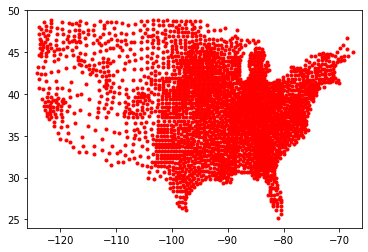

In [4]:
fig, ax=plt.subplots(figsize=(6,4))
CountyD=database.CovidData
for key in CountyD:
    lg=CountyD[key].Long
    lt=CountyD[key].Lat
    ax.plot(lg, lt, 'r.');
    ax.axis([-126,-66, 24,50])
    print(key, CountyD[key].Combined_Key)

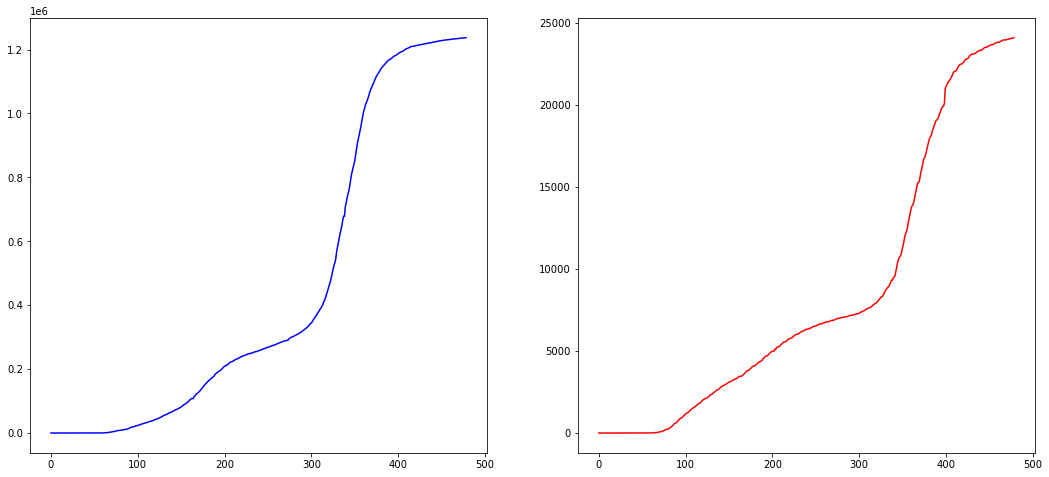

In [5]:
k1=6037 #LA county
i1=database.CovidData[k1].infections
d1=database.CovidData[k1].deaths

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(i1, color='blue', label='infections')
ax2[1].plot(d1, color='red', label='deaths')


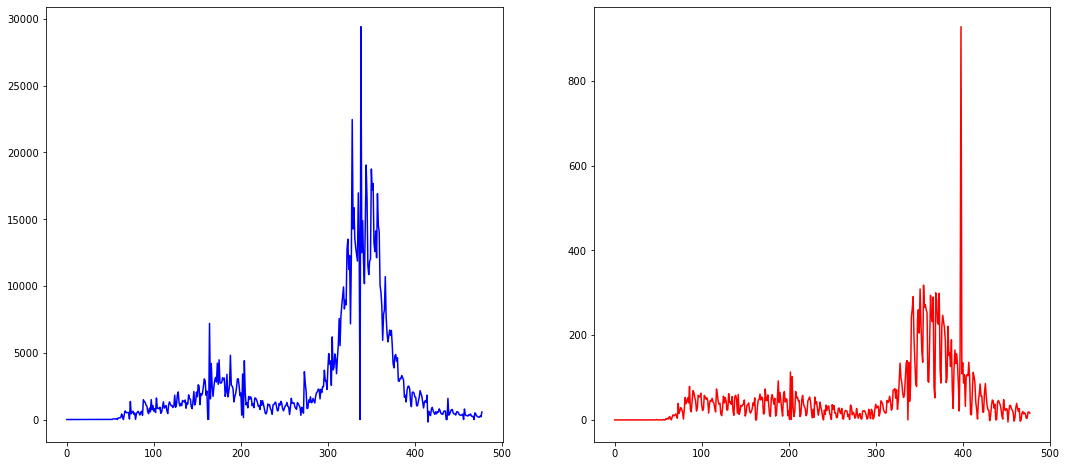

In [6]:
ri1=np.diff(i1)
rd1=np.diff(d1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(ri1, color='blue', label='infections')
ax2[1].plot(rd1, color='red', label='deaths')

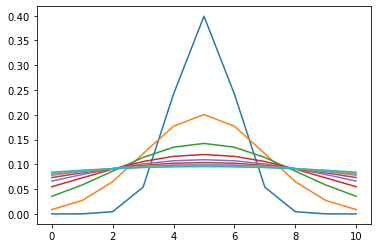

In [7]:
sigma = np.array([1,2,3,4,5,6,7,8,9,10])
for i in range(10):
    x2 = np.arange(-5, 6)
    kernel2 = np.exp(-(x2) ** 2 / (2 * sigma[i] ** 2))
    kernel2=kernel2/sum(kernel2)
    plt.plot(kernel2)

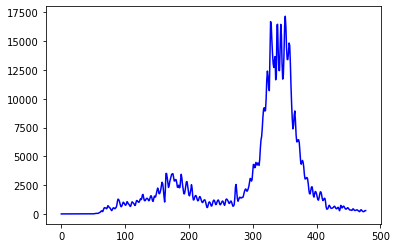

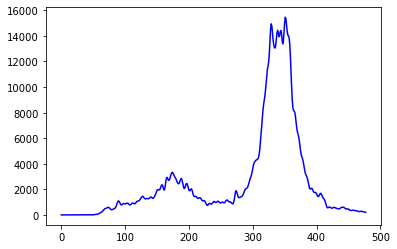

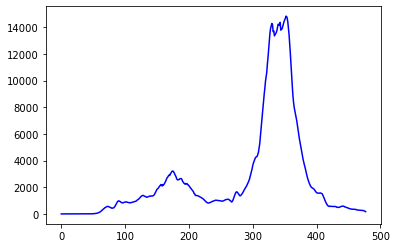

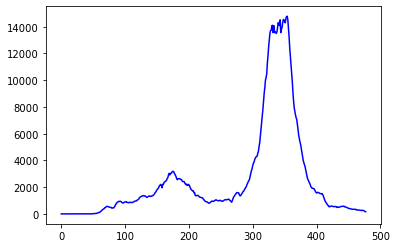

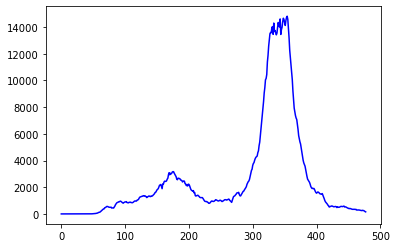

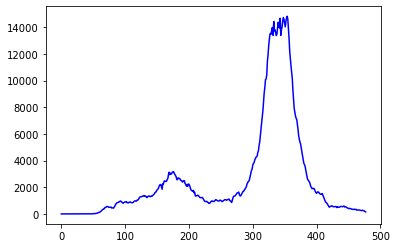

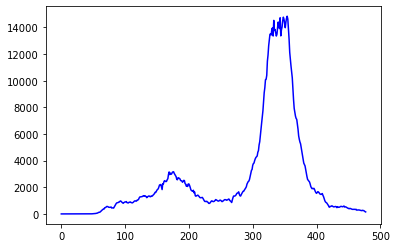

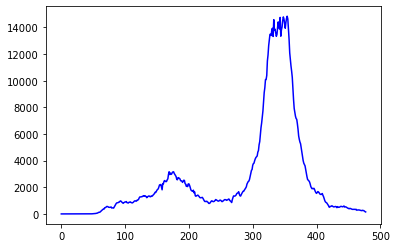

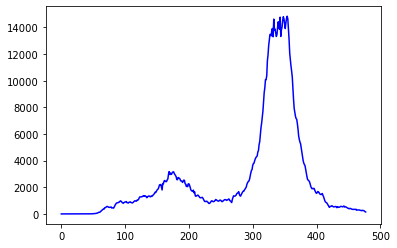

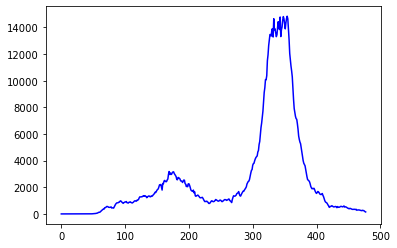

In [8]:
sigma = np.array([1,2,3,4,5,6,7,8,9,10])
for i in range(10):
    x2 = np.arange(-5, 6)
    kernel2 = np.exp(-(x2) ** 2 / (2 * sigma[i] ** 2))
    kernel2=kernel2/sum(kernel2)
    fi1=np.convolve(ri1, kernel2, 'same')
    fd1=np.convolve(rd1, kernel2, 'same')
    fig, ax=plt.subplots(figsize=(6,4))
    ax.plot(fi1, color='blue', label='infections')

(479,)


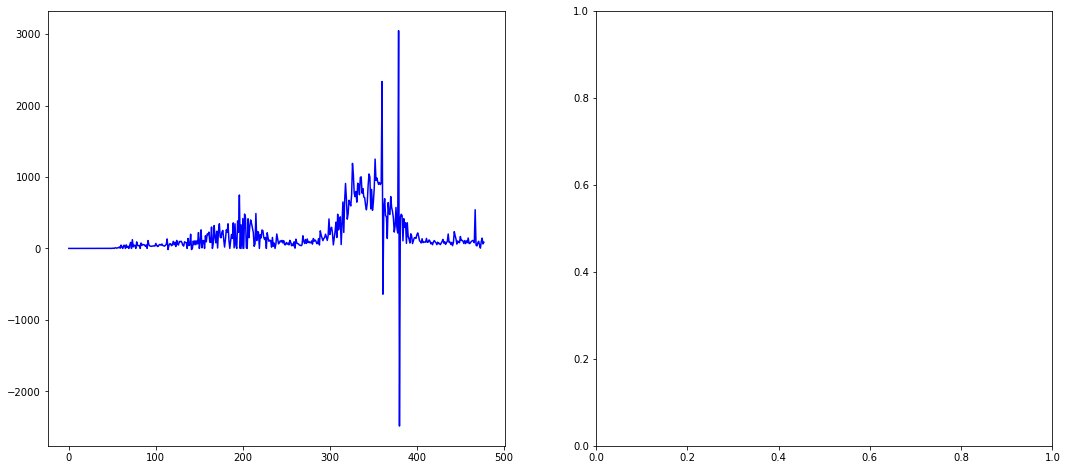

In [9]:
k1=6001
i1=database.CovidData[k1].infections
print(i1.shape)
ri1=np.diff(i1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(ri1, color='blue', label='infections')

# Alameda County Data

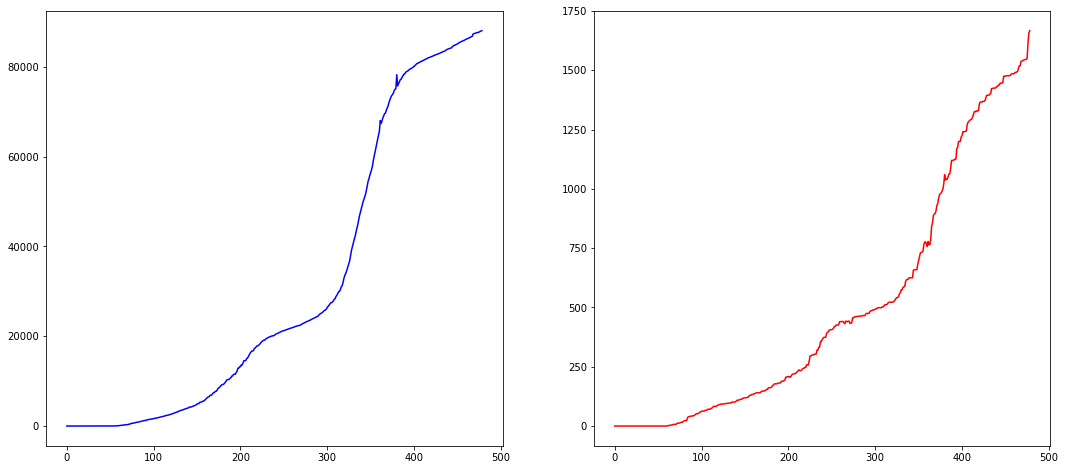

In [10]:
k1=6001
i1=database.CovidData[k1].infections
d1=database.CovidData[k1].deaths

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(i1, color='blue', label='infections')
ax2[1].plot(d1, color='red', label='deaths')


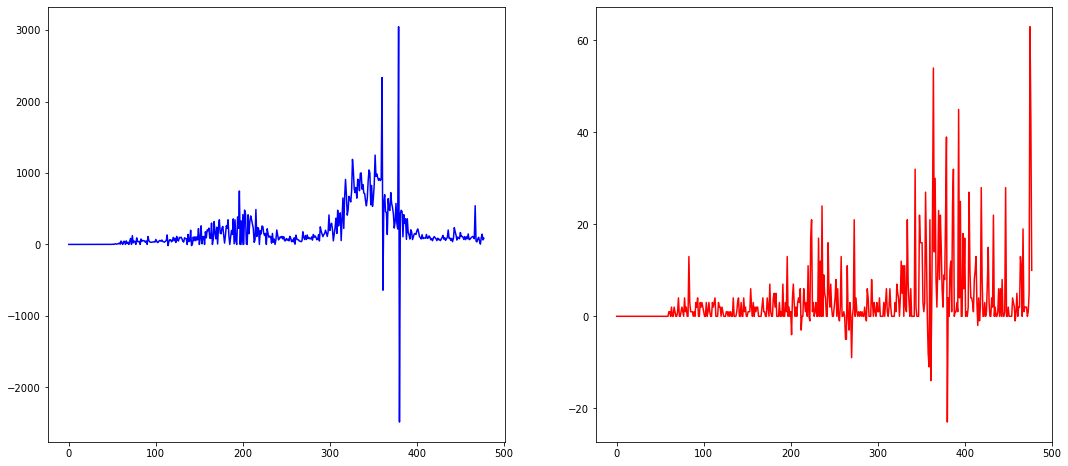

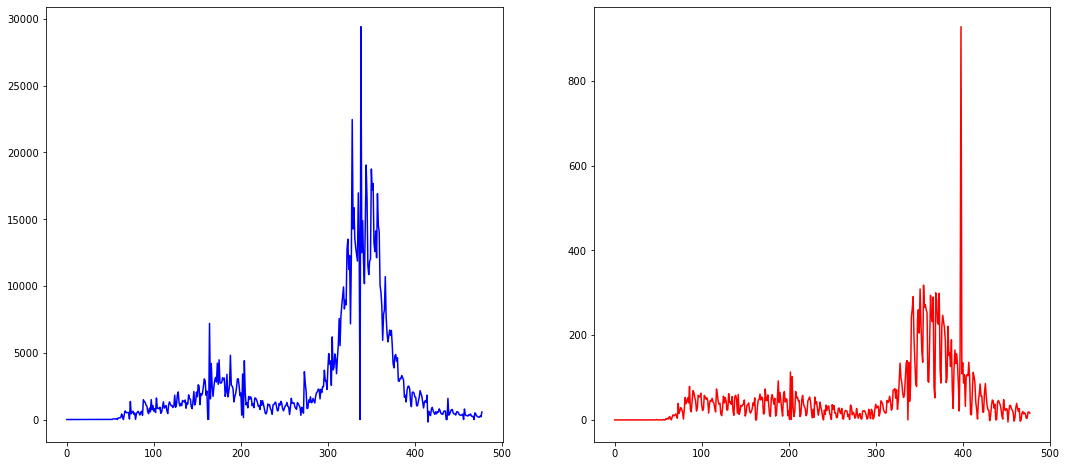

In [11]:
kAL = 6001
i1=database.CovidData[kAL].infections
d1 = database.CovidData[kAL].deaths
ri1=np.diff(i1)
rd1=np.diff(d1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(ri1, color='blue', label='infections')
ax2[1].plot(rd1, color='red', label='deaths')

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
kLA=6037
i1=database.CovidData[kLA].infections
d1=database.CovidData[kLA].deaths
ri1=np.diff(i1)
rd1=np.diff(d1)
ax2[0].plot(ri1, color='blue', label='infections')
ax2[1].plot(rd1, color='red', label='deaths')

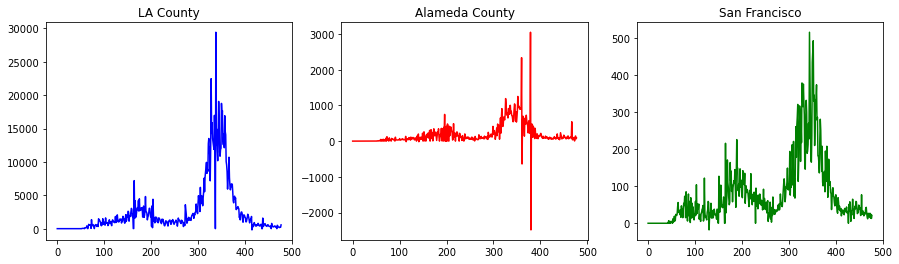

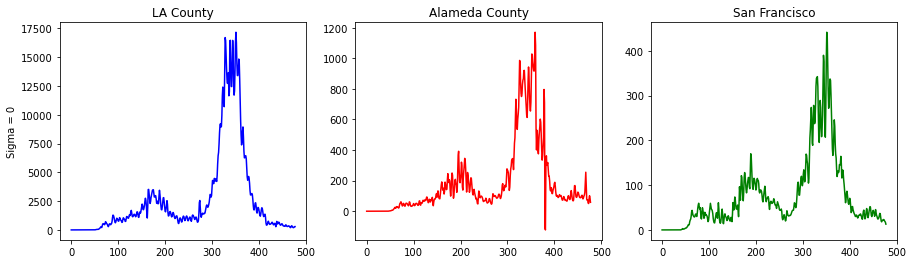

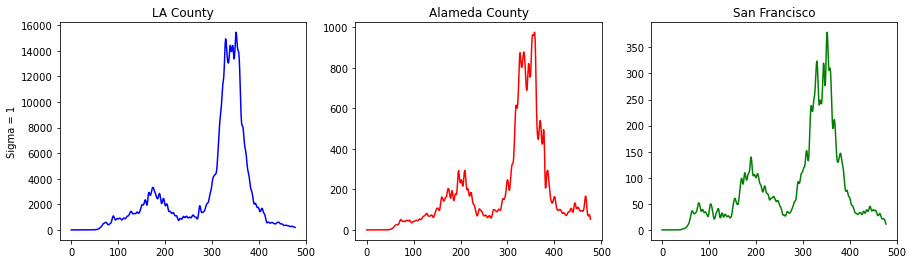

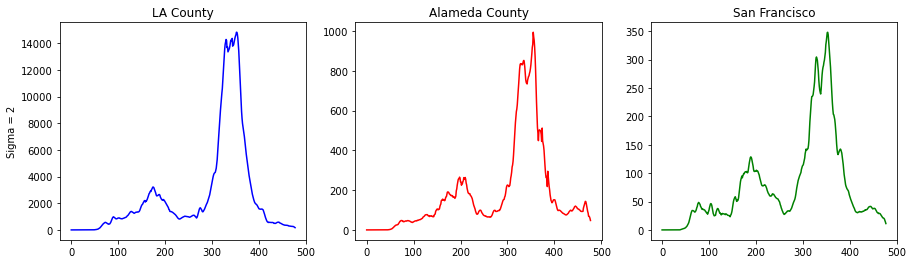

In [14]:
sigma = np.array([1,2,3])

kAl = 6001 #Alameda County
iAl=database.CovidData[kAl].infections
dAl = database.CovidData[kAl].deaths
riAl=np.diff(iAl)
rdAl=np.diff(dAl)

kLA=6037 #LA County
iLA=database.CovidData[kLA].infections
dLA=database.CovidData[kLA].deaths
riLA=np.diff(iLA)
rdLA=np.diff(dLA)

kSF=6075 #SF County
iSF=database.CovidData[kSF].infections
dSF=database.CovidData[kSF].deaths
riSF=np.diff(iSF)
rdSF=np.diff(dSF)

fig2, ax2=plt.subplots(1, 3, figsize=(15,4))
ax2[0].plot(riLA, color='blue', label='LA')
ax2[0].set_title('LA County')
ax2[1].plot(riAL, color='red', label='AL')
ax2[1].set_title('Alameda County') 
ax2[2].plot(riSF, color='green', label='SF')
ax2[2].set_title('San Francisco')
    
for i in range(3):
    x2 = np.arange(-5, 6)
    kernel2 = np.exp(-(x2) ** 2 / (2 * sigma[i] ** 2))
    kernel2=kernel2/sum(kernel2)
    fiLA=np.convolve(riLA, kernel2, 'same')
    fdLA=np.convolve(rdLA, kernel2, 'same')
    fiAL=np.convolve(riAL, kernel2, 'same')
    fdAL=np.convolve(rdAL, kernel2, 'same')
    fiSF=np.convolve(riSF, kernel2, 'same')
    fdSF=np.convolve(rdSF, kernel2, 'same')
    fig2, ax2=plt.subplots(1, 3, figsize=(15,4))
    ax2[0].plot(fiLA, color='blue', label='LA')
    ax2[0].set_title('LA County')
    ax2[0].set_ylabel('Sigma = ' + str(i))
    ax2[1].plot(fiAL, color='red', label='AL')
    ax2[1].set_title('Alameda County')
    ax2[2].plot(fiSF, color='green', label='SF')
    ax2[2].set_title('San Francisco')

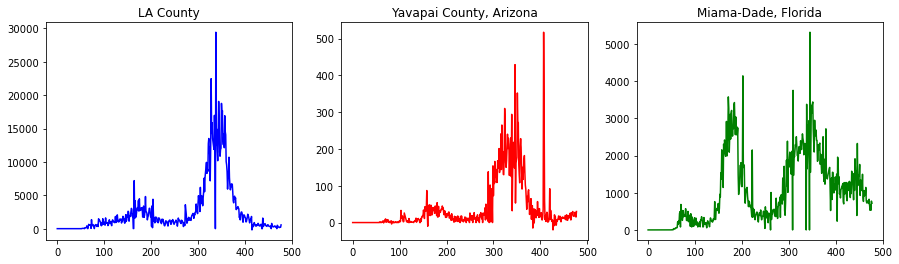

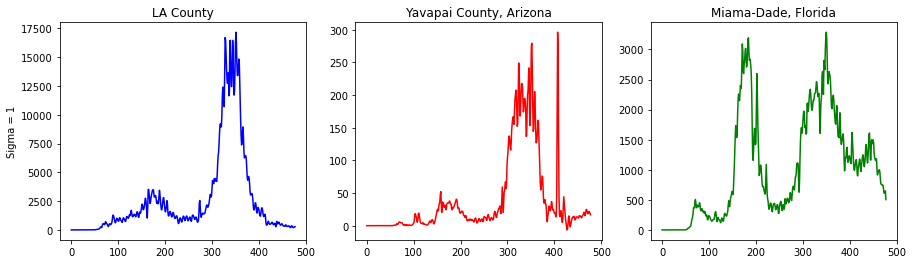

In [20]:
sigma = np.array([1,2,3])

kAL = 4025 #Yavapai County, Ar
iAL=database.CovidData[kAL].infections
dAL = database.CovidData[kAL].deaths
riAL=np.diff(iAL)
rdAL=np.diff(dAL)

kLA=6037 #LA County
iLA=database.CovidData[kLA].infections
dLA=database.CovidData[kLA].deaths
riLA=np.diff(iLA)
rdLA=np.diff(dLA)

kSF=12086 #Miama-Dade, Florida
iSF=database.CovidData[kSF].infections
dSF=database.CovidData[kSF].deaths
riSF=np.diff(iSF)
rdSF=np.diff(dSF)

fig2, ax2=plt.subplots(1, 3, figsize=(15,4))
ax2[0].plot(riLA, color='blue', label='LA')
ax2[0].set_title('LA County')
ax2[1].plot(riAL, color='red', label='AL')
ax2[1].set_title('Yavapai County, Arizona')
ax2[2].plot(riSF, color='green', label='SF')
ax2[2].set_title('Miama-Dade, Florida')
    
for i in range(1):
    x2 = np.arange(-5, 6)
    kernel2 = np.exp(-(x2) ** 2 / (2 * sigma[i] ** 2))
    kernel2=kernel2/sum(kernel2)
    fiLA=np.convolve(riLA, kernel2, 'same')
    fdLA=np.convolve(rdLA, kernel2, 'same')
    fiAL=np.convolve(riAL, kernel2, 'same')
    fdAL=np.convolve(rdAL, kernel2, 'same')
    fiSF=np.convolve(riSF, kernel2, 'same')
    fdSF=np.convolve(rdSF, kernel2, 'same')
    fig2, ax2=plt.subplots(1, 3, figsize=(15,4))
    ax2[0].plot(fiLA, color='blue', label='LA')
    ax2[0].set_title('LA County')
    ax2[0].set_ylabel('Sigma = ' + str(i + 1))
    ax2[1].plot(fiAL, color='red', label='AL')
    ax2[1].set_title('Yavapai County, Arizona')
    ax2[2].plot(fiSF, color='green', label='SF')
    ax2[2].set_title('Miama-Dade, Florida')